In [196]:
#import necessary libraries
!pip install --upgrade scikit-learn
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [197]:
#Load the dataset
copper=pd.read_csv("C:\Guvi project\capstone project guvi\industrial Copper Modelling\Copper_Set.xlsx - Result 1.csv")  

In [198]:
copper.shape

(181673, 14)

In [199]:
copper.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [200]:
copper.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [201]:
# dealing with data in wrong format,for categorical variables, this step is ignored
copper['item_date']=pd.to_datetime(copper['item_date'],format='%Y%m%d',errors='coerce').dt.date
copper['quantity tons']=pd.to_numeric(copper['quantity tons'],errors='coerce')
copper['customer']=pd.to_numeric(copper['customer'],errors='coerce')
copper['country']=pd.to_numeric(copper['country'],errors='coerce')
copper['application']=pd.to_numeric(copper['application'],errors='coerce')
copper['thickness']=pd.to_numeric(copper['thickness'],errors='coerce')
copper['width']=pd.to_numeric(copper['width'],errors='coerce')
copper['material_ref']=copper['material_ref'].str.lstrip('0')
copper['product_ref']=pd.to_numeric(copper['product_ref'],errors='coerce')
copper['delivery date']=pd.to_datetime(copper['delivery date'],format='%Y%m%d',errors='coerce').dt.date
copper['selling_price']=pd.to_numeric(copper['selling_price'],errors='coerce')


In [202]:
copper.sample(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
127286,BBA868C9-B6A1-4A0C-9B18-6891CB0FF807,2020-10-08,3.703866,30202938.0,25.0,Won,W,41.0,2.0,1425.0,101948,1670798778,2020-10-01,572.0
42041,4207B0DE-D227-4A63-952A-F35A41290577,2021-02-09,6.706212,30211296.0,32.0,Won,W,41.0,1.0,900.0,B340100905,164141591,2021-04-01,1099.0
106317,BEB2EF29-4521-44C0-8D6A-2964BAB7EA7D,2020-11-10,29.795487,30338528.0,79.0,Not lost for AM,S,15.0,8.0,1500.0,NaN,640405,2021-01-01,616.0


In [203]:
copper.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


<Axes: xlabel='width'>

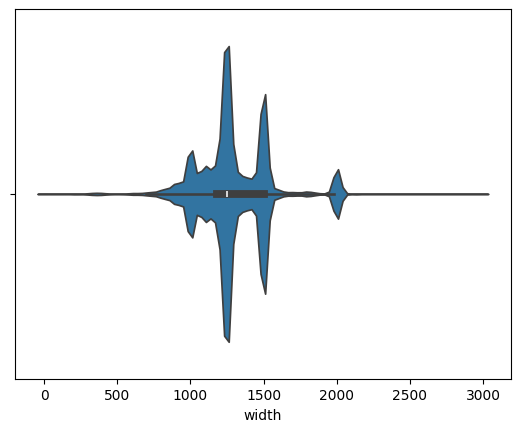

In [204]:
sns.violinplot(x=copper["width"])

<Axes: xlabel='country'>

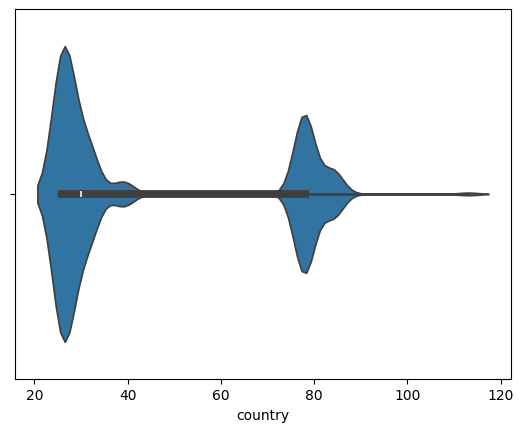

In [205]:
sns.violinplot(x=copper['country'])

<Axes: xlabel='application'>

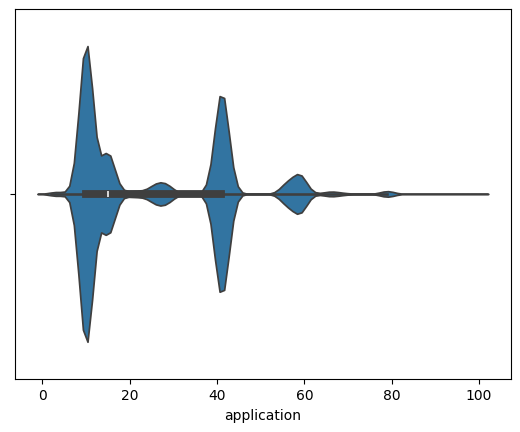

In [206]:
sns.violinplot(x=copper['application'])

Exploratory Data Analysis

In [207]:
copper.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [208]:
copper.isnull().sum()   

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [209]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data. 
copper["material_ref"].fillna('unknown',inplace=True)

In [210]:
copper.drop(["material_ref"],axis=1,inplace=True)

In [211]:
copper=copper.dropna()

In [212]:
copper.isnull().sum()   

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

<Axes: >

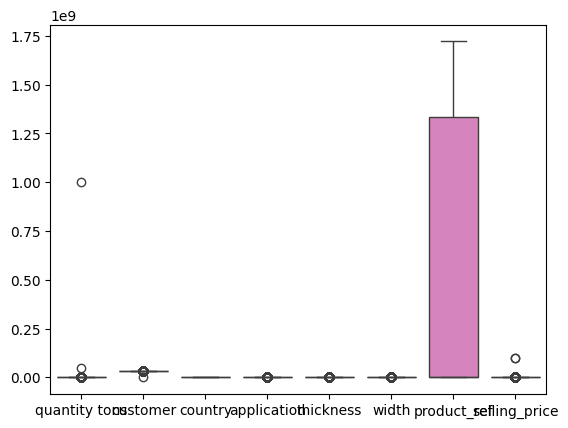

In [213]:
#draw boxplot
sns.boxplot(data=copper)


In [214]:
copper_frame=copper.copy()

In [215]:
a = copper_frame['selling_price'] <= 0
print(a.sum())
copper_frame.loc[a, 'selling_price'] = np.nan

a = copper_frame['quantity tons'] <= 0
print(a.sum())
copper_frame.loc[a, 'quantity tons'] = np.nan

a = copper_frame['thickness'] <= 0
print(a.sum())



7
4
0


In [216]:
copper_frame.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

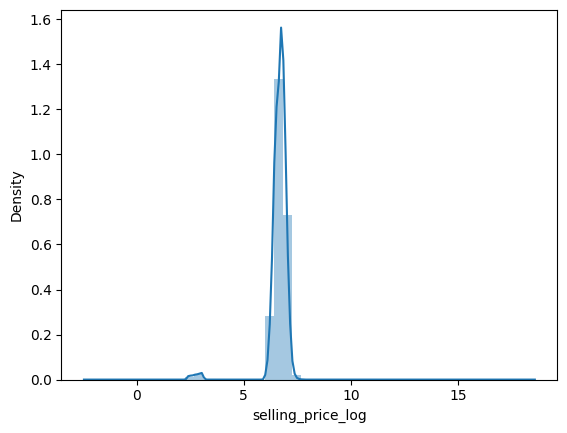

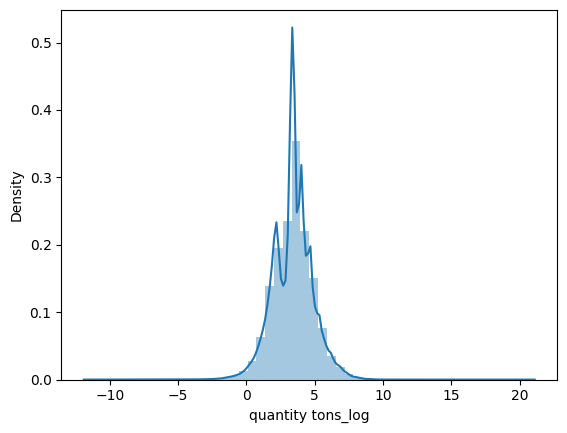

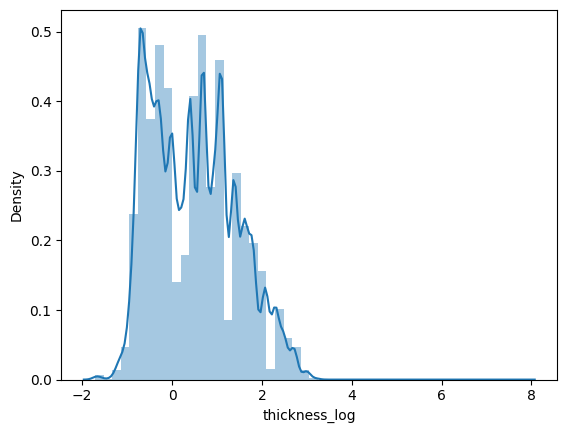

In [217]:
copper_frame['selling_price_log'] = np.log(copper_frame['selling_price'])
sns.distplot(copper_frame['selling_price_log'])
plt.show()

copper_frame['quantity tons_log'] = np.log(copper_frame['quantity tons'])
sns.distplot(copper_frame['quantity tons_log'])
plt.show()

copper_frame['thickness_log'] = np.log(copper_frame['thickness'])
sns.distplot(copper_frame['thickness_log'])
plt.show()
# reverts log
# sns.distplot(copper_frame_p['reverted_values'])


In [218]:
copper_frame

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,6.428105,1.443523,-0.342490
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,6.398595,NaN,-0.162519


In [219]:
status = ['Won', 'Draft', 'to be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
item_type = ['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']


In [220]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
ordEncoder_status = OrdinalEncoder(categories=[status], handle_unknown='use_encoded_value', unknown_value=-1)
ordEncoder_type = OrdinalEncoder(categories=[item_type], handle_unknown='use_encoded_value', unknown_value=-1)
copper_frame['status']= ordEncoder_status.fit_transform(copper_frame[['status']])
copper_frame['item type'] = ordEncoder_type.fit_transform(copper_frame[['item type']])


In [221]:
copper_frame['status'].value_counts()

status
 0.0    116004
 3.0     34431
 4.0     19568
 6.0      4276
-1.0      4167
 1.0      3121
 7.0        53
 8.0        10
 5.0         1
Name: count, dtype: int64

In [222]:
copper_frame.status.value_counts()

status
 0.0    116004
 3.0     34431
 4.0     19568
 6.0      4276
-1.0      4167
 1.0      3121
 7.0        53
 8.0        10
 5.0         1
Name: count, dtype: int64

In [223]:
copper_frame

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,0.0,0.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,0.0,0.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,0.0,1.0,28.0,0.38,952.0,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,0.0,2.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,0.0,0.0,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,0.0,0.0,41.0,0.96,1220.0,164141591,2020-07-01,591.00,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,0.0,0.0,41.0,0.95,1500.0,164141591,2020-07-01,589.00,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,0.0,0.0,41.0,0.71,1250.0,164141591,2020-07-01,619.00,6.428105,1.443523,-0.342490
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,NaN,30200854.0,25.0,0.0,0.0,41.0,0.85,1250.0,164141591,2020-07-01,601.00,6.398595,NaN,-0.162519


In [224]:
copper_frame=copper_frame.dropna()

In [225]:
#Regression

In [226]:
#split data into x,y[x-independant,Y-Dependent]
x= copper_frame[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=copper_frame['selling_price_log']


In [227]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(x)


array([[ 0.41506739, -0.65235785, -0.80569829, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993, -0.65235785, -0.80569829, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529, -0.65235785,  0.08912241, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579, -0.65235785, -0.80569829, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834, -0.65235785, -0.80569829, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496, -0.65235785, -0.80569829, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [228]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(145296, 9)
(36324, 9)
(145296,)
(36324,)


In [229]:
#import regression algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [230]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.03213921475611792
0.023024808221660642


In [231]:
rf=RandomForestRegressor(n_estimators=20,max_depth=4,random_state=42)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.8731437594600109
0.8858256116045382


In [232]:
gbr=GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
print(gbr.score(x_test,y_test))


0.722466371280982
0.731801984427645


In [233]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [234]:
#check metrics
from sklearn import metrics

In [235]:
#check MSE
metrics.mean_squared_error(y_test,y_pred)

np.float64(0.04028331713987124)

In [236]:
#check MAE
metrics.mean_absolute_error(y_test,y_pred)

np.float64(0.12665584219472378)

In [237]:
#R2 score
metrics.r2_score(y_test,y_pred)

0.877172755267416

In [238]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(ss, f)
with open('item.pkl', 'wb') as f:
    pickle.dump(ordEncoder_status, f)
with open('status.pkl', 'wb') as f:
    pickle.dump(ordEncoder_type, f)


In [239]:
#classsification of copper_modelling

In [240]:
copper.status.value_counts()

status
Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [241]:
copper_classify=copper.copy()

In [242]:
copper_classify=copper[copper['status'].isin(['Won','Lost'])]
len(copper_classify)

150435

In [243]:
copper_classify.status.value_counts()


status
Won     116004
Lost     34431
Name: count, dtype: int64

In [244]:
#use ordinal encoder to convert categorical data into numerical data
ordEnco=OrdinalEncoder()
copper_classify['status']=ordEnco.fit_transform(copper_classify[['status']])
copper_classify['item type']=ordEnco.fit_transform(copper_classify[['item type']])

In [245]:
#split data x and y(x-independant,y-dependant)
x= copper_classify[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = copper_classify['status']


In [246]:
#Apply standardScaler
ss.fit_transform(x)

array([[-0.09139439,  0.09705592,  0.76978981, ..., -0.71017265,
        -0.72507203,  1.6673573 ],
       [ 1.52755772,  0.76054292,  0.76978981, ..., -0.83268141,
        -0.2835426 ,  1.66443363],
       [ 0.66147626, -0.62373848,  1.72295071, ..., -0.62850015,
        -0.74727633, -0.66115687],
       ...,
       [-0.20459491, -0.71081685,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [-4.74988274, -0.77269647,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [ 0.70809988, -0.75206993,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041]])

In [247]:
#split data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120348, 9)
(30087, 9)
(120348,)
(30087,)


In [248]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [249]:
dtc=DecisionTreeRegressor(max_depth=5, random_state=1)
dtc.fit(x_train,y_train)
train_score=dtc.score(x_train,y_train)
test_score=dtc.score(x_test,y_test)
print(train_score)
print(test_score)

0.2555556585747554
0.25309353689630143


In [250]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.771612324259647
0.7691694087147273


In [251]:
knc=KNeighborsClassifier(n_neighbors=6)
knc.fit(x_train,y_train)
print(knc.score(x_train,y_train))
print(knc.score(x_test,y_test))

0.9251005417622229
0.8944062219563267


In [252]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(x_train,y_train)
print(gbc.score(x_train,y_train))
print(gbc.score(x_test,y_test))

0.819540000664739
0.8204872536311364


In [253]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(x_train,y_train)
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

0.8197809685246119
0.8201548841692425


In [254]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(x_train, y_train)
xgb_model.score(x_train, y_train)


0.6164689299157442

In [255]:
y_predict = xgb_model.predict(x_test)


In [256]:
mean_squared_error(y_test, y_predict)


np.float64(0.07433673635338428)

In [257]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [258]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

1.0
0.933027553428391


In [259]:
knc.predict(x_test)

array([0., 1., 1., ..., 0., 1., 0.])

In [260]:
y_pred=knc.predict(x_test)

In [261]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 5557,  1388],
       [ 1789, 21353]])

Text(58.222222222222214, 0.5, 'Truth')

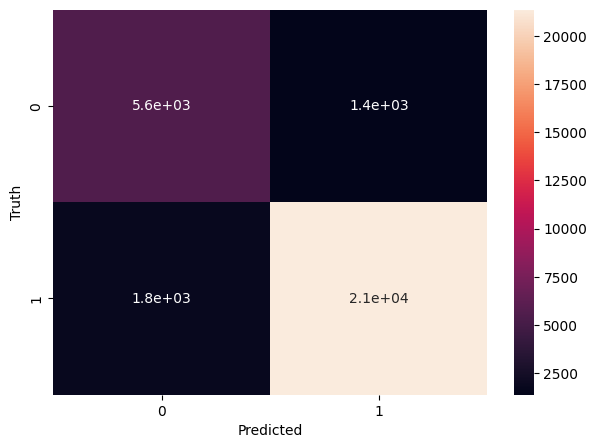

In [262]:
#draw heatmap
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [263]:
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay,classification_report, roc_curve, auc


In [264]:
#check accuracy score.
accuracy_score(y_test, y_pred)


0.8944062219563267

In [265]:
f1_score(y_test,y_pred,average='macro')

np.float64(0.8542254613270369)

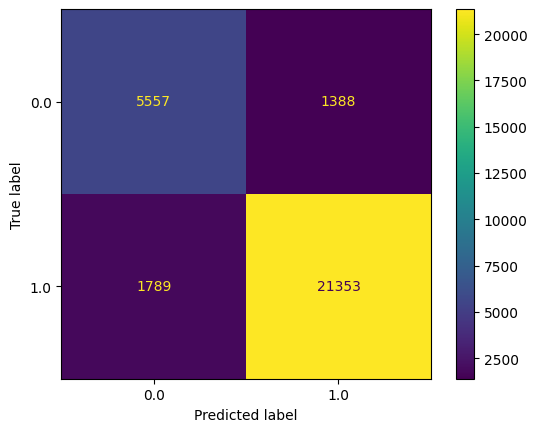

In [266]:
ConfusionMatrixDisplay.from_estimator(knc,x_test,y_test)


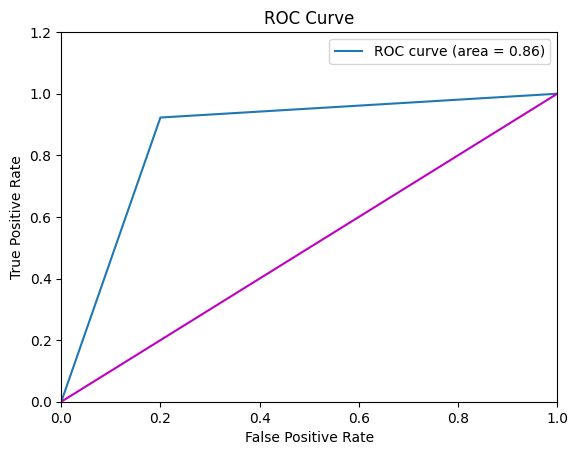

In [267]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [268]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      6945
         1.0       0.94      0.92      0.93     23142

    accuracy                           0.89     30087
   macro avg       0.85      0.86      0.85     30087
weighted avg       0.90      0.89      0.90     30087



In [269]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(knc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(ss, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ordEnco, f)